**Exploratory Data Analysis of Fetal Deaths in USA, 2014-2017**

{Describe Dataset and Project}

***Preliminary Wrangling***

In [119]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [120]:
# load the dataset
df = pd.read_csv('us_fetal_deaths_2014-2017.txt', sep = "	")
df.head()

,Notes,Age of Mother Year,Age of Mother Year Code,Age of Father Year,Age of Father Year Code,Mother's Pre-pregnancy BMI,Mother's Pre-pregnancy BMI Code,Cause of Death,Cause of Death Code,Fetal Deaths
0,NaN,12 years and under,12,Unknown or Not Stated,99.0,Normal 18.5-24.9,2.0,Other preterm infants,P07.3,1.0
1,NaN,12 years and under,12,Unknown or Not Stated,99.0,Overweight 25.0-29.9,3.0,Newborn affected by other forms of placental s...,P02.1,1.0
2,NaN,12 years and under,12,Unknown or Not Stated,99.0,Overweight 25.0-29.9,3.0,Fetal death of unspecified cause,P95,1.0
3,NaN,12 years and under,12,Unknown or Not Stated,99.0,Overweight 25.0-29.9,3.0,Not Reported,NR,2.0
4,NaN,12 years and under,12,Unknown or Not Stated,99.0,Obesity II 35.0-39.9,5.0,Not Reported,NR,1.0


In [121]:
# drop unnecessary columns
df = df.drop(['Notes', 'Age of Mother Year Code', 'Age of Father Year Code', \
         "Mother's Pre-pregnancy BMI Code", "Cause of Death Code"], axis = 1)
df.head()

,Age of Mother Year,Age of Father Year,Mother's Pre-pregnancy BMI,Cause of Death,Fetal Deaths
0,12 years and under,Unknown or Not Stated,Normal 18.5-24.9,Other preterm infants,1.0
1,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Newborn affected by other forms of placental s...,1.0
2,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Fetal death of unspecified cause,1.0
3,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Not Reported,2.0
4,12 years and under,Unknown or Not Stated,Obesity II 35.0-39.9,Not Reported,1.0


In [122]:
# rename the columns
df.columns = ['mother_age', 'father_age', 'mother_BMI', 'death_cause', 'death_count']
df.head()

,mother_age,father_age,mother_BMI,death_cause,death_count
0,12 years and under,Unknown or Not Stated,Normal 18.5-24.9,Other preterm infants,1.0
1,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Newborn affected by other forms of placental s...,1.0
2,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Fetal death of unspecified cause,1.0
3,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Not Reported,2.0
4,12 years and under,Unknown or Not Stated,Obesity II 35.0-39.9,Not Reported,1.0


In [123]:
# explore unique mother_age values
df.mother_age.unique()

array(['12 years and under', '13 years', '14 years', '15 years',
       '16 years', '17 years', '18 years', '19 years', '20 years',
       '21 years', '22 years', '23 years', '24 years', '25 years',
       '26 years', '27 years', '28 years', '29 years', '30 years',
       '31 years', '32 years', '33 years', '34 years', '35 years',
       '36 years', '37 years', '38 years', '39 years', '40 years',
       '41 years', '42 years', '43 years', '44 years', '45 years',
       '46 years', '47 years', '48 years', '49 years',
       '50 years and over', nan], dtype=object)

In [124]:
# extract numbers from mother_age values
df['mother_age_bins'] = df.mother_age.str.extract('(\d+)').astype(float)

# create age bins for mother_age values
df['mother_age_bins'] = pd.cut(x=df.mother_age_bins, bins=[11, 15, 25, 35, 45, 51], \
                               labels = ['<=15', '(15-25]', '(25-35]', '(35-45]', '>45'])

df.head()

,mother_age,father_age,mother_BMI,death_cause,death_count,mother_age_bins
0,12 years and under,Unknown or Not Stated,Normal 18.5-24.9,Other preterm infants,1.0,<=15
1,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Newborn affected by other forms of placental s...,1.0,<=15
2,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Fetal death of unspecified cause,1.0,<=15
3,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Not Reported,2.0,<=15
4,12 years and under,Unknown or Not Stated,Obesity II 35.0-39.9,Not Reported,1.0,<=15


In [125]:
# explore unique father_age values

df.father_age.unique()

array(['Unknown or Not Stated', '13 years', '14 years', '15 years',
       '16 years', '17 years', '18 years', '20 years', 'Not Reported',
       '19 years', '21 years', '23 years', '24 years', '26 years',
       '28 years', '30 years', '35 years', '22 years', '25 years',
       '27 years', '29 years', '34 years', '36 years', '37 years',
       '31 years', '32 years', '33 years', '38 years', '39 years',
       '40 years', '44 years', '49 years', '50 years', '41 years',
       '42 years', '58 years', '59 years', '43 years', '45 years',
       '47 years', '64 years', '69 years', '9 years', '46 years',
       '48 years', '53 years', '52 years', '55 years', '57 years',
       '51 years', '61 years', '75 years', '54 years', '67 years',
       '60 years', '63 years', '56 years', '62 years', '73 years',
       '65 years', '70 years', '66 years', '72 years', '71 years',
       '78 years', '77 years', '68 years', nan], dtype=object)

In [126]:
# extract numbers from father_age values
df['father_age_bins'] = df.father_age.str.extract('(\d+)').astype(float)

# create age bins for mother_age values
df['father_age_bins'] = pd.cut(x=df.father_age_bins, bins=[11, 15, 25, 35, 45, 55, 65, 75], \
                               labels = ['<=15', '(15-25]', '(25-35]', '(35-45]', '(45-55]', '(55-65]', '>65'])

df.head()

,mother_age,father_age,mother_BMI,death_cause,death_count,mother_age_bins,father_age_bins
0,12 years and under,Unknown or Not Stated,Normal 18.5-24.9,Other preterm infants,1.0,<=15,NaN
1,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Newborn affected by other forms of placental s...,1.0,<=15,NaN
2,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Fetal death of unspecified cause,1.0,<=15,NaN
3,12 years and under,Unknown or Not Stated,Overweight 25.0-29.9,Not Reported,2.0,<=15,NaN
4,12 years and under,Unknown or Not Stated,Obesity II 35.0-39.9,Not Reported,1.0,<=15,NaN


In [133]:
# explore unique mother_BMI values

df.mother_BMI.unique()

array(['Normal 18.5-24.9', 'Overweight 25.0-29.9', 'Obesity II 35.0-39.9',
       'Underweight <18.5', 'Unknown or Not Stated',
       'Obesity I 30.0-34.9', 'Not Reported',
       'Extreme Obesity III > 39.9'], dtype=object)

In [128]:
# drop rows with null values

df = df.dropna(axis = 'rows', subset = ['death_count'])
df.shape

(36820, 7)

In [137]:
#group by mother BMI
df_bmi = df.groupby(['mother_BMI'])['death_count'].sum()

#sort by death count descending
df_bmi = df_bmi.sort_values(ascending=False)
df_bmi

mother_BMI
Normal 18.5-24.9              26825.0
Overweight 25.0-29.9          19781.0
Obesity I 30.0-34.9           13110.0
Unknown or Not Stated         11478.0
Obesity II 35.0-39.9           7511.0
Not Reported                   7239.0
Extreme Obesity III > 39.9     6216.0
Underweight <18.5              2303.0
Name: death_count, dtype: float64

In [154]:
# exclude not reported death causes
df = df[df['death_cause'] != "Not Reported"]
# group by death_cause
df_death_cause = df.groupby(['death_cause'])['death_count'].sum()
df_death_cause = df_death_cause.sort_values(ascending=False)

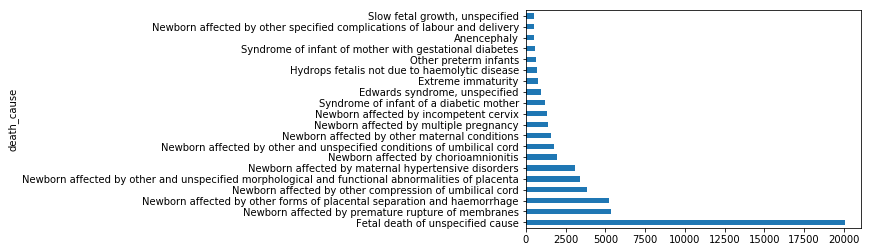

In [155]:
# plotting a bar chart of top 20 death causes counts

df_death_cause.head(20).plot.barh()
plt.show()

Text(0, 0.5, 'Death Cause')

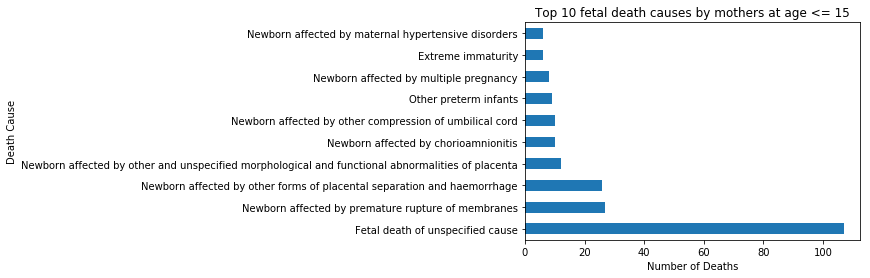

In [182]:
df[df['mother_age_bins'] == '<=15'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers at age <= 15")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Text(0, 0.5, 'Death Cause')

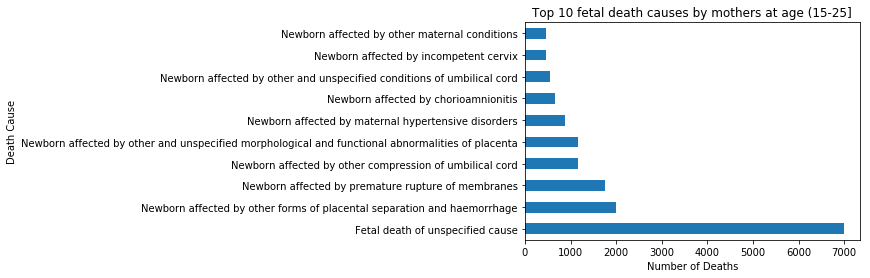

In [183]:
df[df['mother_age_bins'] == '(15-25]'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()

plt.title("Top 10 fetal death causes by mothers at age (15-25]")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Text(0, 0.5, 'Death Cause')

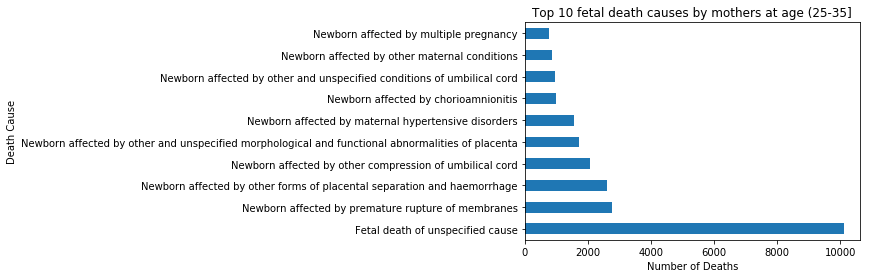

In [184]:
df[df['mother_age_bins'] == '(25-35]'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers at age (25-35]")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Text(0, 0.5, 'Death Cause')

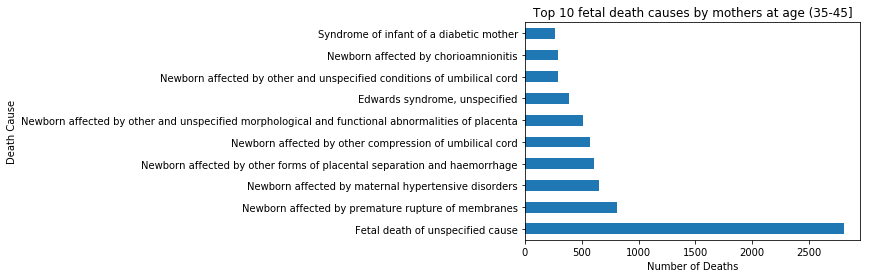

In [185]:
df[df['mother_age_bins'] == '(35-45]'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers at age (35-45]")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Text(0, 0.5, 'Death Cause')

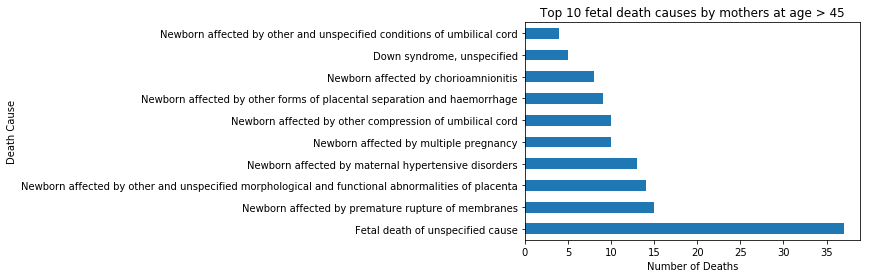

In [187]:
df[df['mother_age_bins'] == '>45'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers at age > 45")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

In [188]:
df.mother_BMI.unique()

array(['Normal 18.5-24.9', 'Overweight 25.0-29.9', 'Underweight <18.5',
       'Unknown or Not Stated', 'Obesity I 30.0-34.9',
       'Obesity II 35.0-39.9', 'Extreme Obesity III > 39.9',
       'Not Reported'], dtype=object)

Text(0, 0.5, 'Death Cause')

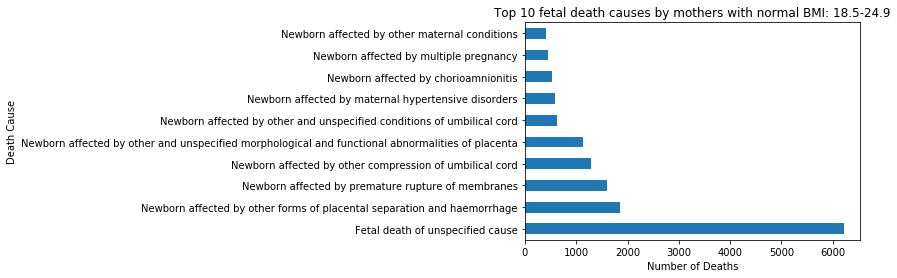

In [191]:
df[df['mother_BMI'] == 'Normal 18.5-24.9'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers with normal BMI: 18.5-24.9")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Text(0, 0.5, 'Death Cause')

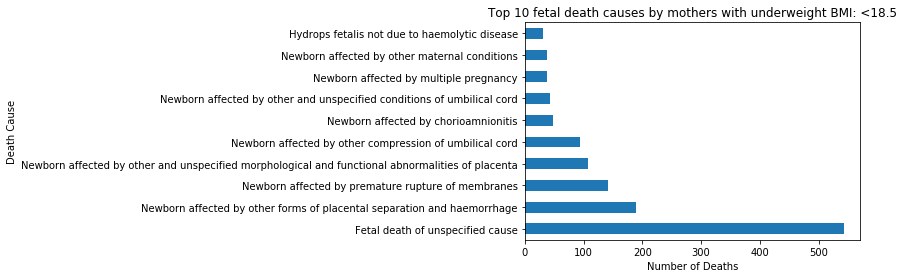

In [192]:
df[df['mother_BMI'] == 'Underweight <18.5'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers with underweight BMI: <18.5")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Text(0, 0.5, 'Death Cause')

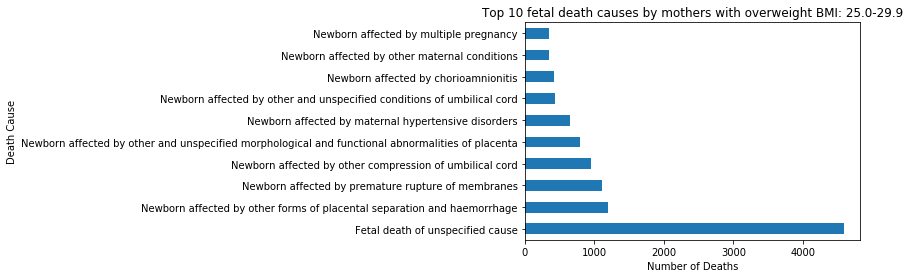

In [193]:
df[df['mother_BMI'] == 'Overweight 25.0-29.9'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers with overweight BMI: 25.0-29.9")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Text(0, 0.5, 'Death Cause')

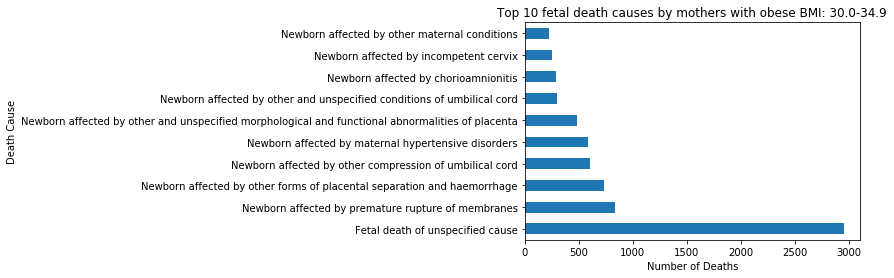

In [194]:
df[df['mother_BMI'] == 'Obesity I 30.0-34.9'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers with obese BMI: 30.0-34.9")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Text(0, 0.5, 'Death Cause')

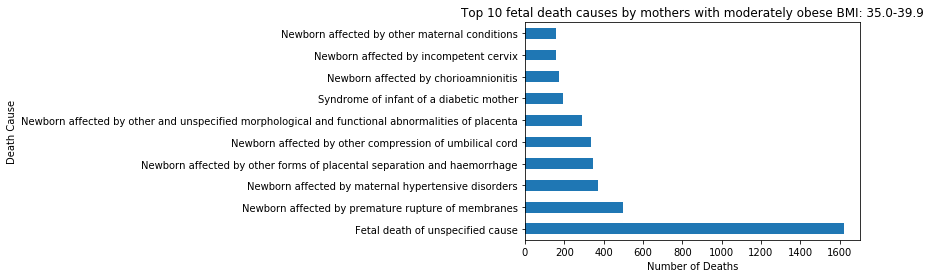

In [195]:
df[df['mother_BMI'] == 'Obesity II 35.0-39.9'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers with moderately obese BMI: 35.0-39.9")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

In [ ]:
df[df['mother_BMI'] == 'Extreme Obesity III > 39.9'].groupby(['death_cause'])['death_count'].sum().\
sort_values(ascending=False).head(10).plot.barh()
plt.title("Top 10 fetal death causes by mothers with extremely obese BMI: 35.0-39.9")
plt.xlabel('Number of Deaths')
plt.ylabel('Death Cause')

Some Questions to answer:

* What are top 10 fetal death causes for each age group mother and father separately?

* What are top 10 fetal death causes for each mother BMI group ?
